## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset into a DataFrame

In [4]:
df = pd.read_csv(r"E:\GUC\Sem 10\(NETW 1013) Machine Learning\Week 4\1 - Lab 2 - Clustering (Lab manual)\dataset\CC GENERAL.csv")

In [7]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
df = df.fillna(0)

In [11]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
df.describe(include="object")

,CUST_ID
count,8950
unique,8950
top,C10001
freq,1


In [15]:
df=df.drop(["CUST_ID"],axis=1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

Find the optimal Kmeans model

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
ssd = []
sil_score = []
for k in range(2,15,1):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_df)
    cluster_labels = model.fit_predict(scaled_df)
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
    sil_score.append(silhouette_score(scaled_df, cluster_labels))
    

Text(0, 0.5, ' Sum of Squared Distances')

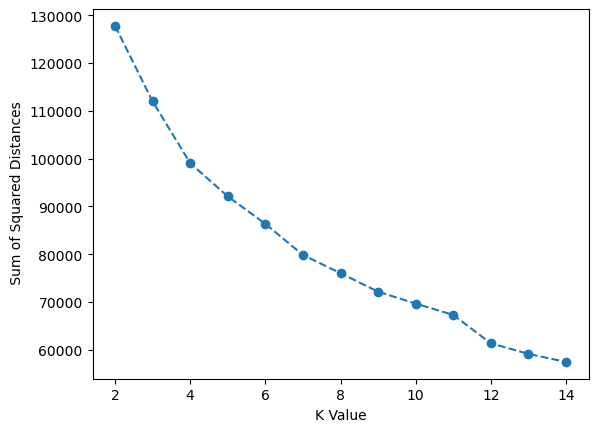

In [17]:
plt.plot(range(2,15,1),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

Text(0, 0.5, ' Score')

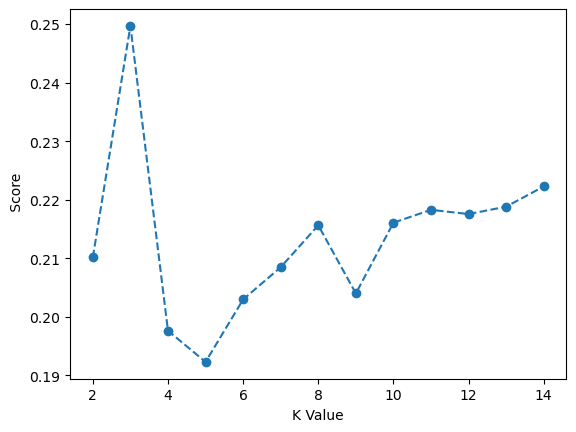

In [18]:
plt.plot(range(2,15,1),sil_score,'o--')
plt.xlabel("K Value")
plt.ylabel(" Score")

Choose the optimal K and calculate the silhouette score for the best model.

<Axes: >

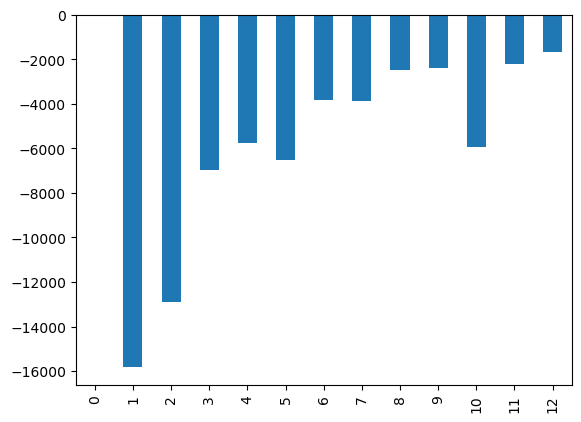

In [20]:
pd.Series(ssd).diff().plot(kind='bar')

In [21]:
model = KMeans(n_clusters=3)
# Make sure to watch video to understand this line and fit() vs transform()
cluster_labels = model.fit_predict(scaled_df)

In [22]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_df, cluster_labels)

0.1853108112071571

## Agglomerative Clustering

Find the optimal agglomerative clustering model.

In [40]:
from sklearn.cluster import AgglomerativeClustering

In [42]:
s=[]
linkage_list=["average","single"]
affinity_list=["euclidean","manhattan","cosine"]
n=np.arange(2,20)
best=-1
best_affinity=" "
best_n=1
best_linkage= " "
for n_clusters in n:
    for affinity in affinity_list:
           for linkage in linkage_list:
                model = AgglomerativeClustering(n_clusters=n_clusters,metric=affinity,linkage=linkage)
                model = model.fit(scaled_df)
                silhouette=silhouette_score(scaled_df,model.labels_)#,metric='euclidean')
                s.append(silhouette)
                #print("Silhouette Score for number of clusters = "+ str(n_clusters)+ " "+str(affinity)+" and "+str(linkage)+" is "+str(silhouette)+".")
                if silhouette >= best:
                    best_n=n_clusters
                    best =silhouette 
                    best_affinity=affinity
                    best_linkage=linkage
print("Best agglomerative clustering model for this data is number of clusters="+" " + str(best_n)+" " +"with linkage of "
      +str(best_linkage)+" and affinity of "+str(best_affinity)+"." "Silhouette Score is "+str(best)+".")

Best agglomerative clustering model for this data is number of clusters= 2 with linkage of average and affinity of euclidean.Silhouette Score is 0.8496939039704499.


Choose the optimal K and calculate the silhouette score for the best model.

In [49]:
model1 = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage = "average")
cluster_labels = model1.fit_predict(df)
silhouette_score(scaled_df, cluster_labels)

0.8408109014271563

In [51]:
model2 = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage = "average")
cluster_labels = model2.fit_predict(df)
silhouette_score(scaled_df, cluster_labels)

0.7815860932009397

In [53]:
model2 = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage = "average")
cluster_labels = model2.fit_predict(df)
silhouette_score(scaled_df, cluster_labels)

0.7796363302424536

## DBSCAN

Find the optimal DBSCAN model.

In [55]:
from sklearn.cluster import DBSCAN

Find the parameters that optimize the performance of your model and calculate the silhouette score.

In [61]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    cluster_labels = dbscan.fit_predict(scaled_df)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(cluster_labels)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

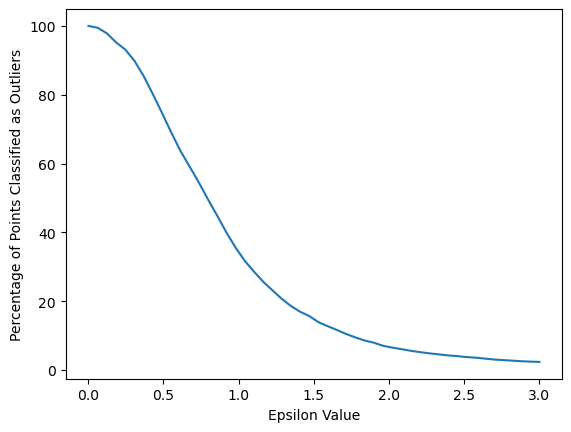

In [62]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

In [65]:
eps=1.5

In [67]:
dbscan = DBSCAN(eps=eps)
cluster_labels = dbscan.fit_predict(scaled_df)

In [71]:
silhouette_score(scaled_df, cluster_labels)

0.0007146193406960615

## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?